# TASK 1 -  Obtain and review raw data


In [1]:
import pandas as pd

In [2]:
runkeeper_file = 'cardioActivities.csv'
df_activities = pd.read_csv(runkeeper_file, parse_dates = ['Date'], index_col = 'Date')
df_activities.index = df_activities.index.date
df_activities.index.name = 'Date'
#df_activities.insert(0, 'Index', df_activities.index)
df_activities.reset_index(inplace=True)
print(df_activities.columns)

Index(['Date', 'Activity Id', 'Type', 'Route Name', 'Distance (km)',
       'Duration', 'Average Pace', 'Average Speed (km/h)', 'Calories Burned',
       'Climb (m)', 'Average Heart Rate (bpm)', 'Friend's Tagged', 'Notes',
       'GPX File'],
      dtype='object')


In [3]:
df_activities.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [4]:
df_activities.sample(n=3)


,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
51,2018-04-13,911b312b-cf1d-499d-bb46-cdeb31da9c9e,Running,NaN,12.90,1:07:47,5:15,11.42,908.000000,169,147.0,NaN,TomTom MySports Watch,2018-04-13-183712.gpx
247,2015-09-28,16bb07d0-9417-428e-b30e-2e7286b2d25a,Running,NaN,18.94,1:44:26,5:31,10.88,1300.999999,158,138.0,NaN,TomTom MySports Watch,2015-09-28-182121.gpx
414,2013-10-15,9aef5085-2cab-4872-8797-85794667ba23,Running,NaN,8.57,49:35,5:47,10.37,616.000000,45,NaN,NaN,NaN,2013-10-15-182814.gpx


In [5]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

# TASK 2 - Data Preprocessing

In [6]:
cols_to_drop = ["Route Name", "Friend's Tagged", "GPX File", "Activity Id", "Calories Burned", "Notes"]
df_activities = df_activities.drop(columns=cols_to_drop)
df_activities.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [7]:
activity_counts = df_activities['Type'].value_counts()
display(activity_counts)

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

In [8]:
df_activities['Type']=df_activities['Type'].str.replace('Other', 'Unicycling', case = False)
activity_counts = df_activities['Type'].value_counts()
print(activity_counts)

Type
Running       459
Cycling        29
Walking        18
Unicycling      2
Name: count, dtype: int64


In [9]:
missing_value_count = df_activities.isnull().sum()
print(missing_value_count)

Date                          0
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


# Task 3 - Dealing with missing values

In [10]:
#The mean imputation can be calculated for average heart rate column 

In [11]:
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_walk = df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
print(avg_hr_cycle)

124.4


In [12]:
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
print(df_cycle)

           Date     Type  Distance (km) Duration Average Pace  \
8    2018-10-06  Cycling          19.63  1:26:26         4:24   
10   2018-09-16  Cycling          32.61  1:55:15         3:32   
12   2018-09-01  Cycling          36.89  1:58:39         3:13   
13   2018-08-28  Cycling          28.17  1:27:07         3:06   
14   2018-08-25  Cycling          19.41  1:11:33         3:41   
87   2017-09-22  Cycling          49.18  2:42:32         3:18   
97   2017-08-17  Cycling          15.53    40:04         2:35   
129  2017-05-01  Cycling          20.19    54:29         2:42   
179  2016-10-03  Cycling          23.62  1:12:42         3:05   
187  2016-09-10  Cycling          13.11    32:47         2:30   
189  2016-09-04  Cycling          13.64    40:43         2:59   
193  2016-08-27  Cycling          24.67  1:08:53         2:48   
196  2016-08-20  Cycling          31.48  1:29:50         2:51   
198  2016-08-17  Cycling          21.82  1:22:34         3:47   
219  2016-05-22  Cycling 

In [13]:
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace = True)
print(df_cycle)

           Date     Type  Distance (km) Duration Average Pace  \
8    2018-10-06  Cycling          19.63  1:26:26         4:24   
10   2018-09-16  Cycling          32.61  1:55:15         3:32   
12   2018-09-01  Cycling          36.89  1:58:39         3:13   
13   2018-08-28  Cycling          28.17  1:27:07         3:06   
14   2018-08-25  Cycling          19.41  1:11:33         3:41   
87   2017-09-22  Cycling          49.18  2:42:32         3:18   
97   2017-08-17  Cycling          15.53    40:04         2:35   
129  2017-05-01  Cycling          20.19    54:29         2:42   
179  2016-10-03  Cycling          23.62  1:12:42         3:05   
187  2016-09-10  Cycling          13.11    32:47         2:30   
189  2016-09-04  Cycling          13.64    40:43         2:59   
193  2016-08-27  Cycling          24.67  1:08:53         2:48   
196  2016-08-20  Cycling          31.48  1:29:50         2:51   
198  2016-08-17  Cycling          21.82  1:22:34         3:47   
219  2016-05-22  Cycling 

In [14]:
missing_values_count = df_run.isnull().sum()
print(missing_values_count)

Date                        0
Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


In [15]:
display(df_run)

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27,Running,13.02,1:12:50,5:36,10.73,170,154.0
...,...,...,...,...,...,...,...,...
494,2012-09-08,Running,3.27,15:55,4:52,12.32,15,144.0
495,2012-09-04,Running,6.26,32:35,5:12,11.53,34,144.0
498,2012-09-02,Running,3.14,16:16,5:11,11.56,18,144.0
506,2012-08-24,Running,3.15,16:00,5:05,11.82,17,144.0


# Task 4 - Plot Running data 

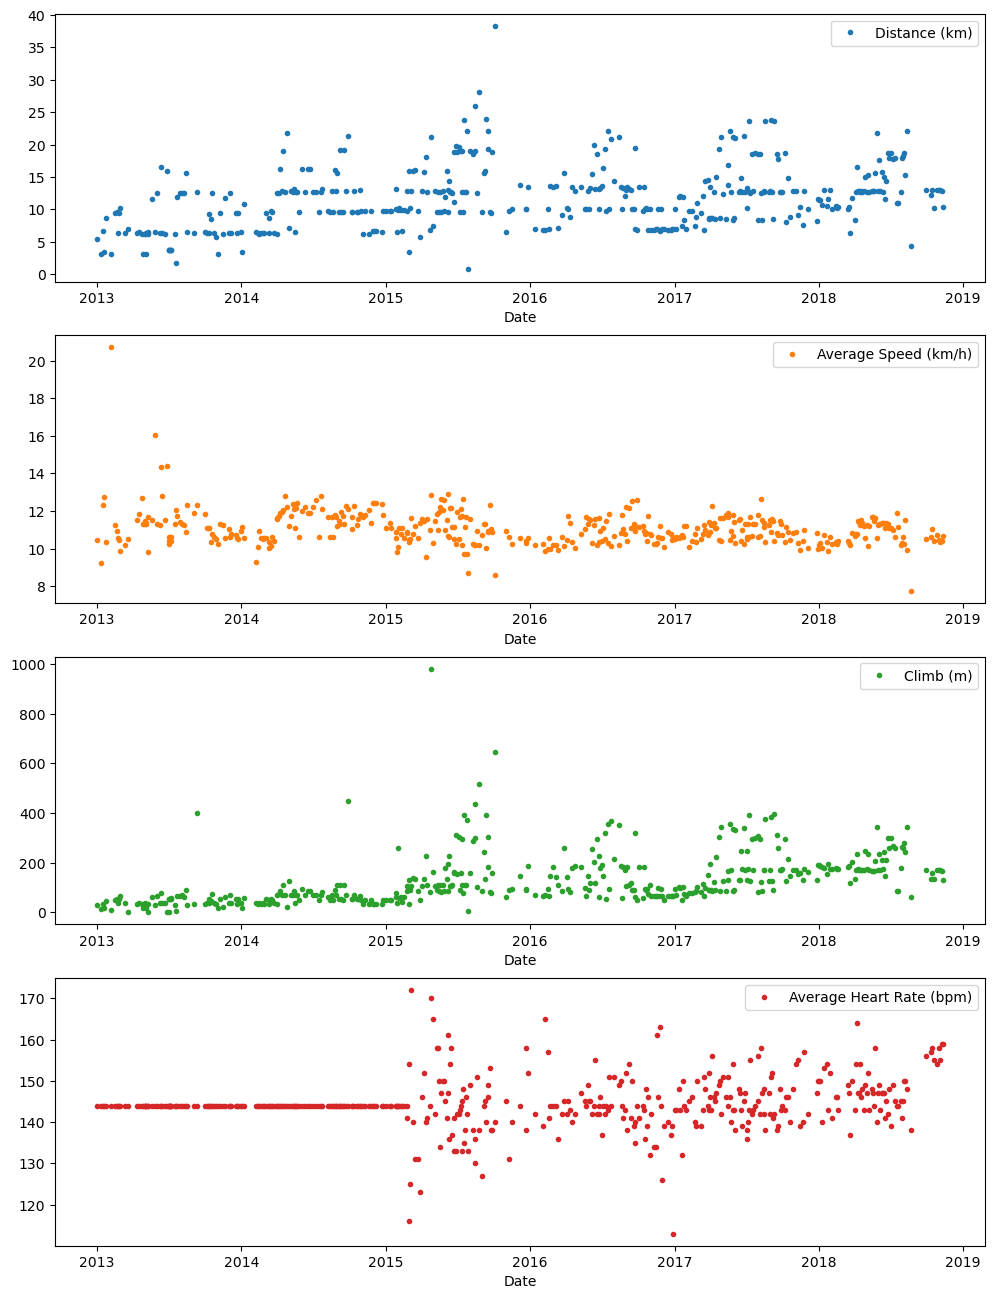

In [16]:
import matplotlib.pyplot as plt
df_run['Date'] = pd.to_datetime(df_run['Date'])
runs_subset_2013_2018 = df_run[(df_run['Date'] >= '2013-01-01') & (df_run['Date'] <= '2018-12-31')].copy()
runs_subset_2013_2018.set_index('Date', inplace=True)
runs_subset_2013_2018.plot(subplots=True, sharex=False, figsize=(12, 16), linestyle='none', marker='o', markersize=3)

#Plot
plt.show()


# Task 5 - Running Statistics

In [17]:
df_run['Date'] = pd.to_datetime(df_run['Date'])
start_date = '2015-01-01'
end_date = '2018-12-31' 
runs_subset_2015_2018 = df_run[(df_run['Date'] >= start_date) & (df_run['Date'] <= end_date)].copy()


In [18]:
runs_subset_2015_2018.reset_index(inplace=True)
runs_subset_2015_2018.set_index('Date', inplace=True)

columns_of_interest = ['Distance (km)', 'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)']

annual_averages = runs_subset_2015_2018[columns_of_interest].resample('A').mean()
print('How my average run looks in last 4 years:')
display(annual_averages)

weekly_averages = runs_subset_2015_2018[columns_of_interest].resample('W').mean()
print('Weekly averages of last 4 years:')
display(weekly_averages)

weekly_counts = runs_subset_2015_2018['Distance (km)'].resample('W').count()
weekly_counts_average = weekly_counts.mean()
print('How many activities per week I had on average:', weekly_counts_average)


How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-01-04,9.780000,11.120000,51.0,144.0
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,9.780000,11.230000,51.0,144.0
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,9.893333,10.423333,58.0,144.0
...,...,...,...,...
2018-10-14,12.620000,10.840000,146.5,157.5
2018-10-21,10.290000,10.410000,133.0,155.0
2018-10-28,13.020000,10.730000,170.0,154.0


How many activities per week I had on average: 1.5


# Visualizations with Averages

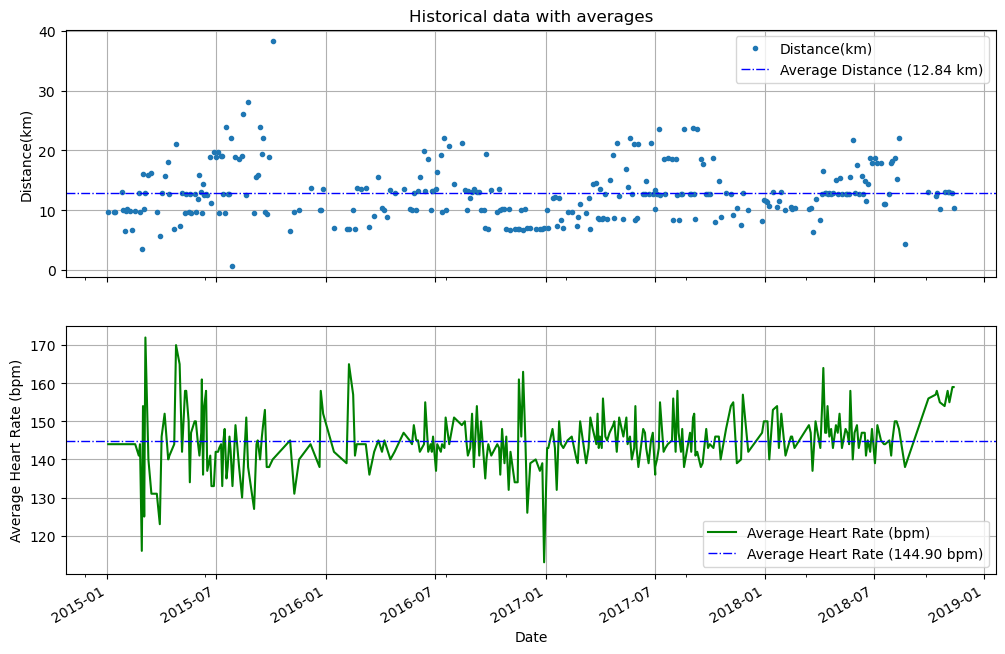

In [19]:
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

fig, (ax1,ax2) = plt.subplots(2, 1, sharex = True, figsize=(12,8))

ax1.plot(runs_distance, marker = 'o', linestyle = 'none', markersize = 3, label = 'Distance(km)')
ax1.set(ylabel = 'Distance(km)', title = 'Historical data with averages')
ax1.axhline(runs_distance.mean(), color = 'blue', linewidth = 1, linestyle = '-.', label=f'Average Distance ({runs_distance.mean():.2f} km)')
ax1.legend()
ax1.grid(True)

runs_hr.plot(ax=ax2, color='green')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.', label=f'Average Heart Rate ({runs_hr.mean():.2f} bpm)')
ax2.legend()
ax2.grid(True)

plt.show()

# Task 7 - Did I  reach my Goals

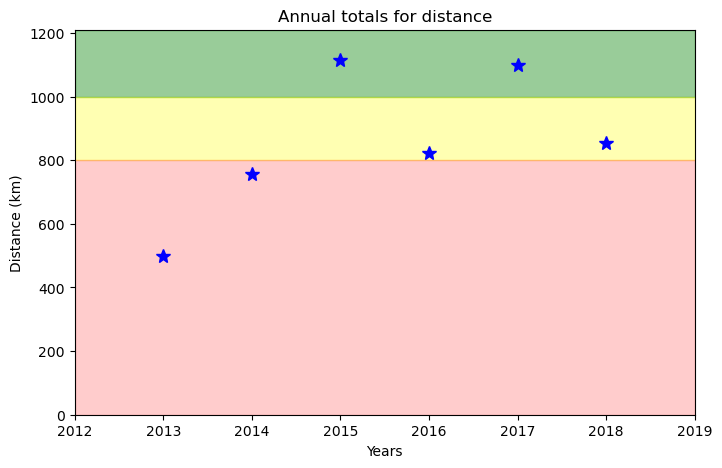

In [20]:
df_run_dist_annual = runs_subset_2013_2018['Distance (km)'].resample('A').sum()

fig = plt.figure(figsize=(8.0,5.0))

ax = df_run_dist_annual.plot(marker='*', markersize=10, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], xlim=['2012', '2019'], ylabel='Distance (km)', xlabel='Years', title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)  
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

plt.show()


# Task 8 - Am I progressing

In [21]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


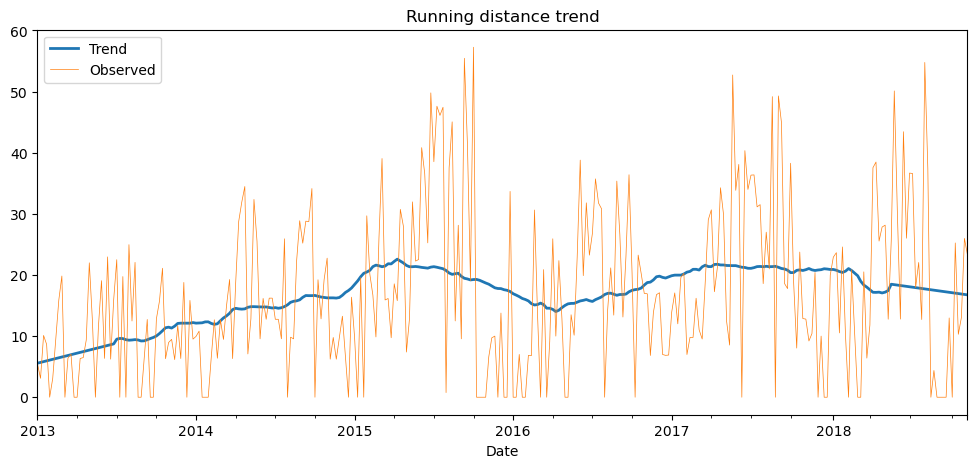

In [22]:
import statsmodels.api as sm

df_run_dist_wkly = runs_subset_2013_2018['Distance (km)'].resample('W').sum().fillna(method='bfill')
#decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, freq=52)
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, period=52, extrapolate_trend='freq')

fig = plt.figure(figsize=(12,5))

ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

# Task 9 - Training intensity

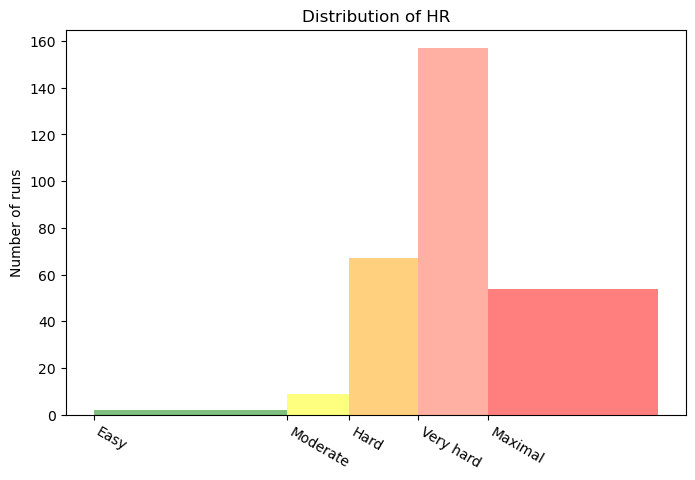

In [23]:
start_date = '2015-03-01'
end_date = '2018-12-31'

runs_subset_2015_03_2018 = df_run[(df_run['Date'] >= start_date) & (df_run['Date'] <= end_date)].copy()

df_run_hr_all = runs_subset_2015_03_2018['Average Heart Rate (bpm)']
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']

fig, ax = plt.subplots(figsize=(8,5))

n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(len(patches)):
    patches[i].set_facecolor(zone_colors[i])
    
ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones[:-1])
ax.set_xticklabels(zone_names, rotation = -30, ha = 'left')

plt.show()

# Task 10 - Detailed summary report

In [28]:
import pandas as pd

df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle])

df_run_walk_cycle.sort_index(ascending=False, inplace=True)

dist_climb_cols = ['Distance (km)', 'Climb (m)']  # Adjust these column names as necessary
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

df_summary = df_totals.stack()

display('Concatenated DataFrame', df_run_walk_cycle.head())
display('Total distances and climbs by activity type', df_totals)
display('Compact reshaped form of the summary report', df_summary)


'Concatenated DataFrame'

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
507,2012-08-22 00:00:00,Running,5.69,31:08,5:29,10.95,32,144.0
506,2012-08-24 00:00:00,Running,3.15,16:00,5:05,11.82,17,144.0
505,2012-08-24,Walking,1.49,13:43,9:14,6.49,9,110.0
504,2012-08-24,Walking,1.48,17:56,12:09,4.94,12,110.0
503,2012-08-28,Walking,1.57,13:39,8:41,6.91,7,110.0


'Total distances and climbs by activity type'

,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


'Compact reshaped form of the summary report'

Type                  
Cycling  Distance (km)      680.58
         Climb (m)         6976.00
Running  Distance (km)     5224.50
         Climb (m)        57278.00
Walking  Distance (km)       33.45
         Climb (m)          349.00
dtype: float64

# Task 11 - Fun Facts

In [31]:
#Total number of km run by the instructor from the fun facts=5224km
#number of shoes used to run this distance=7
# Count average shoes per lifetime (as km per pair) using our fun facts
Total_km_run_fun_facts = 5224
shoes_fun_fact = 7
average_shoes_lifetime = Total_km_run_fun_facts/shoes_fun_fact

# Count number of shoes for Forrest's run distance
Total_km_run_Forrest = 24700
shoes_for_forrest_run = Total_km_run_Forrest//average_shoes_lifetime

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))

Forrest Gump would need 33.0 pairs of shoes!
